# Generate music

In this section, LSTM is trained with more than 1000 pieces of music in ABC notation.
The training uses cross validation in which training set and validation set would be shuffled during the begining of each epoch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from music import *
net = Music(input_size = 93, hidden_size= 100, num_layers= 1)
training_loss_container,test_loss_container = train(net = net, max_epoch= 100,sample_size = 30, learning_rate= 0.01,print_loss = (False,500))

Finish Initialization
None
Epoch[0] Training Loss : 2.7094054202900995	Test Loss : 2.6401615973029817 
Epoch[1] Training Loss : 2.1129636676443946	Test Loss : 2.438484203336494 
Epoch[2] Training Loss : 1.9692502736051878	Test Loss : 2.3806481832372293 
Epoch[3] Training Loss : 1.8946180440982183	Test Loss : 2.2314586894852773 
Epoch[4] Training Loss : 1.835722538150019	Test Loss : 2.240739396108048 
Epoch[5] Training Loss : 1.784210860894786	Test Loss : 2.1231961050736055 
Epoch[6] Training Loss : 1.8078128217822975	Test Loss : 2.1178863045892546 
Epoch[7] Training Loss : 1.7562959226138062	Test Loss : 2.0013693471306135 
Epoch[8] Training Loss : 1.7385886143147946	Test Loss : 2.0227973434541906 
Epoch[9] Training Loss : 1.7540665991273192	Test Loss : 2.0203346856204525 
Epoch[10] Training Loss : 1.6854691743354002	Test Loss : 1.9723425865439432 
Epoch[11] Training Loss : 1.7165184398823314	Test Loss : 2.0400855853887543 
Epoch[12] Training Loss : 1.681229485074679	Test Loss : 1.92635

# Sample of music generated

We generated the music with 600 charactors' length

In [5]:
st, activation_container = heatmap(net, 600, 0.6)
print(st)

X:26
T:La Hornpipe
R:slide
D:Jackid: Holland Pint Slide
Z:id:hn-slide-56
M:6/8
L:1/8
K:G
GAB G2A|def g2e|d2B cBA|B3 B2A|B2A Bcd|e2d Bcd|e2f g2e|d2B c2d|e2d B2A|B2G EFG|A2A A2B|c2A B2B|A2B d2B|c2A AGA|B2d e2d|e2d Bcd|e2d B2A|B2B B2A|Bcd B2B|G2B A2B|c2A Bcd|c2A Bcd|Bcd B2A|B2A B2A|B2A B2A|B2B B2A|B2B BAB|c2A BGE|
faa a2a|g2f e2e|d2B cBA|e2f gfg|f2a afd|B2B B2A|Bcd e2d|e2a a2a|b2b a2f|~g3 efg|
(3Bcd e2 efg|a2g g2f|
g2e dBA|1 d3 d2e:|2 f2f f2f|~g3 e2d|B2A Bcd|B2A B2A|B2B B2A|B2d gfe|d2B d2B|A2A A2B|A2F AcB|A3 A2F|E2A A2B|c2c A2B|G2B G2A|B2A A2F|E2A F2A:|
|:B2A d2e|d2B BAG|F2A d2d||
|:g2g a2g|f2d A2


# Heatmap

Heatmap shows the sensativity for each neuron to each charactor generated

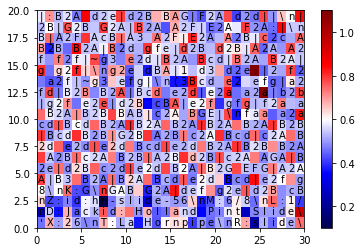

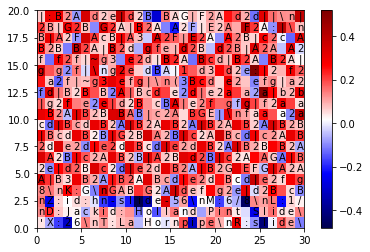

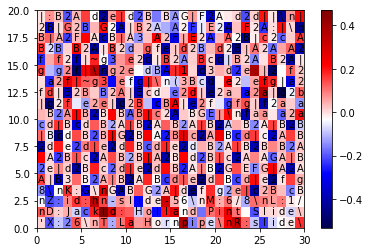

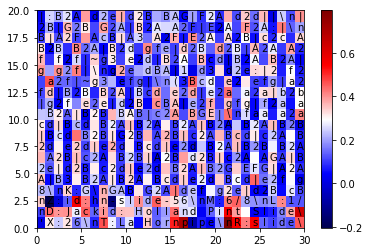

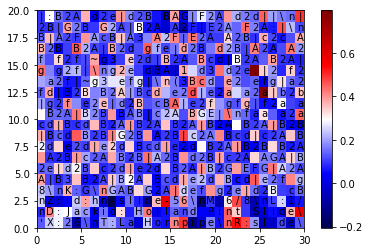

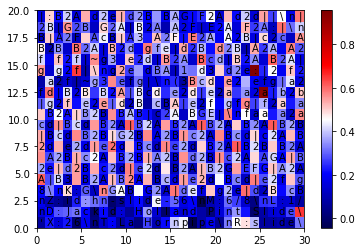

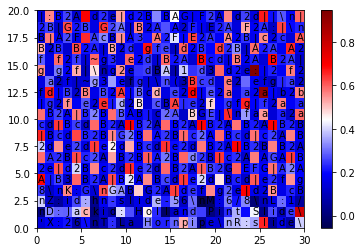

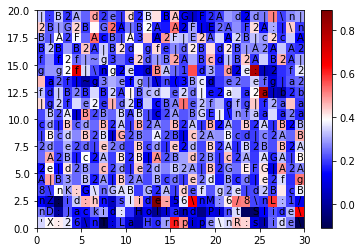

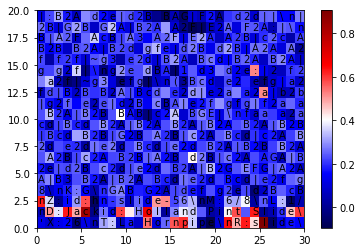

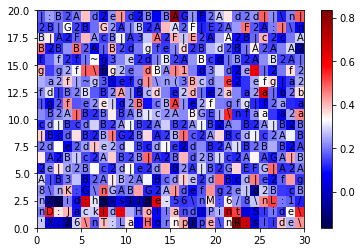

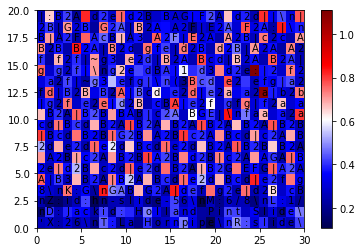

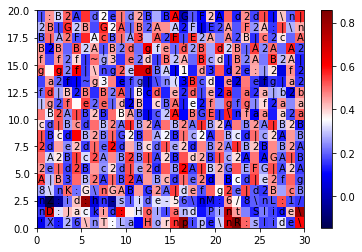

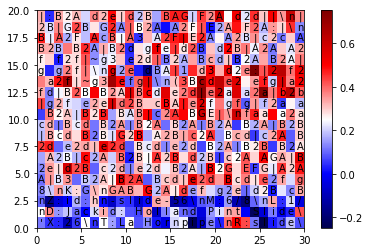

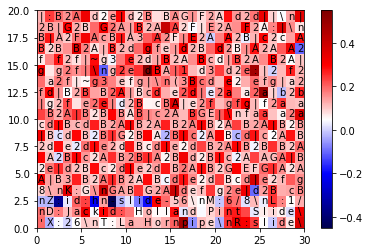

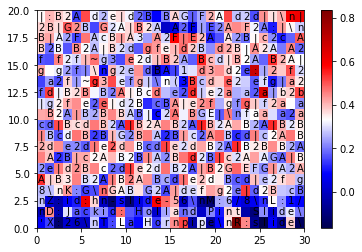

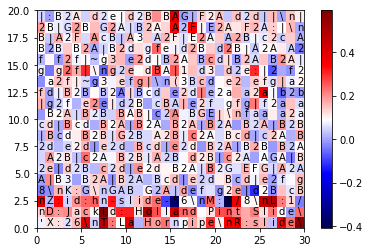

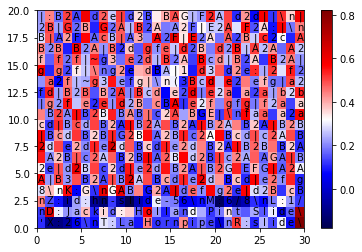

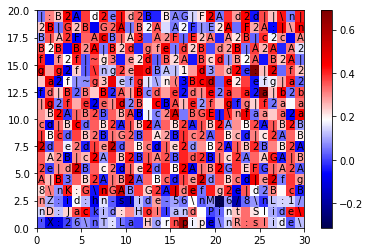

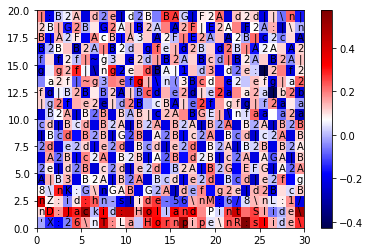

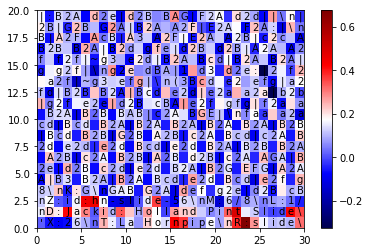

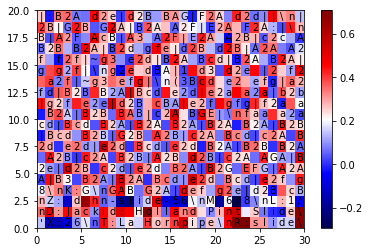

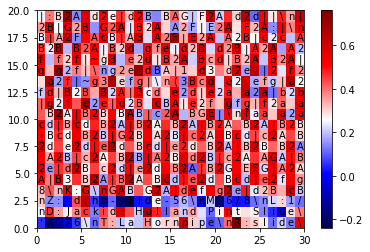

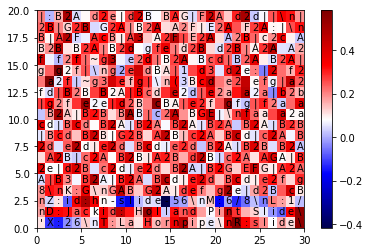

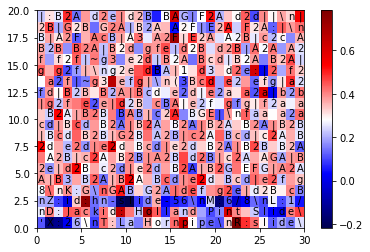

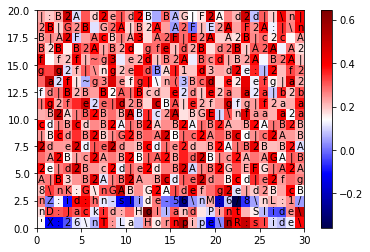

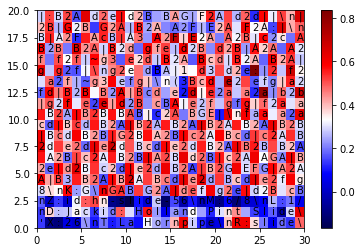

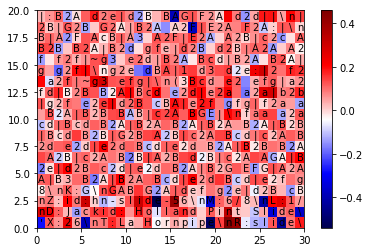

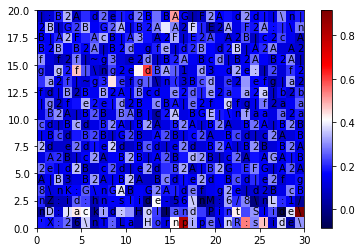

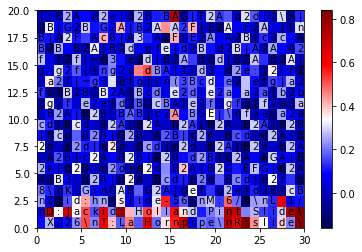

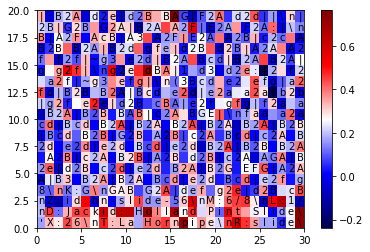

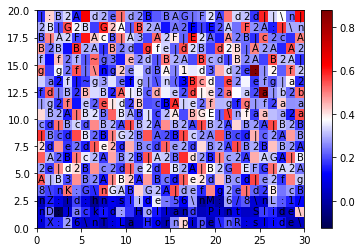

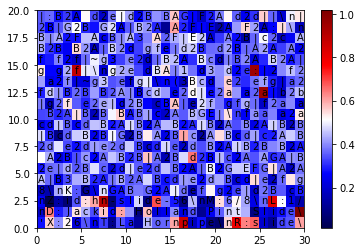

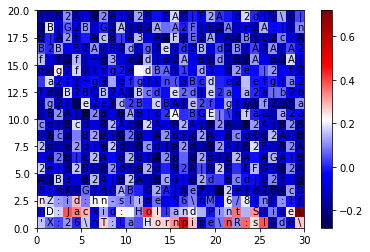

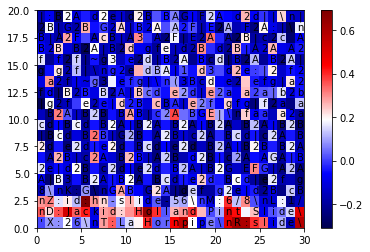

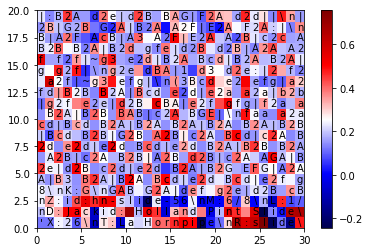

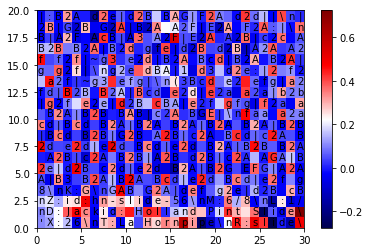

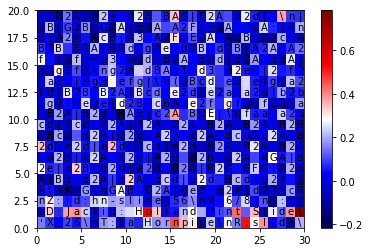

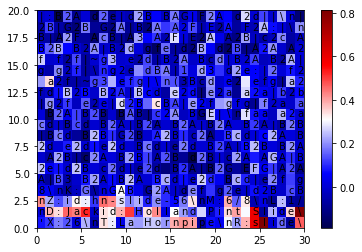

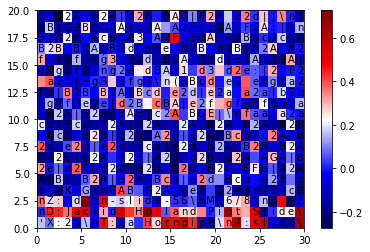

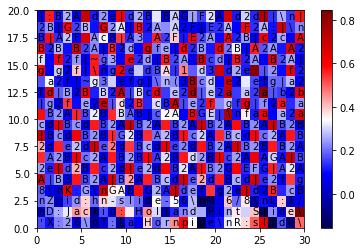

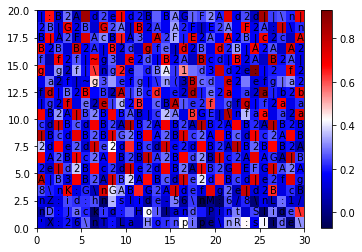

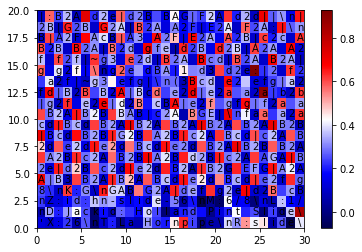

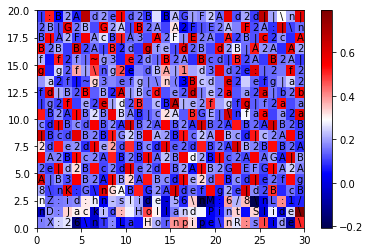

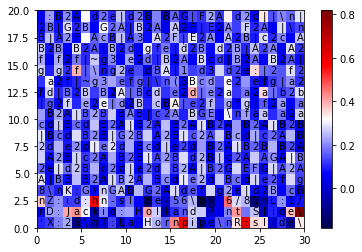

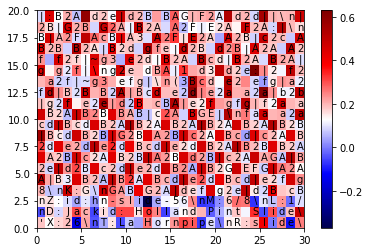

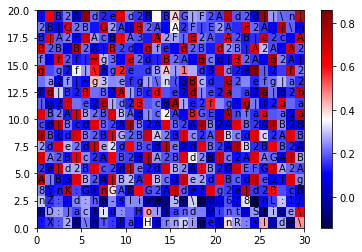

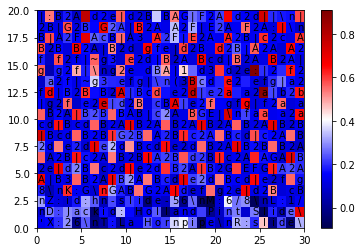

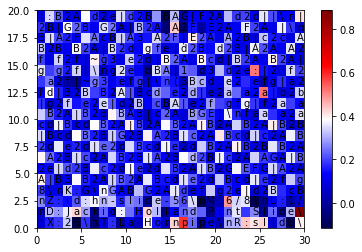

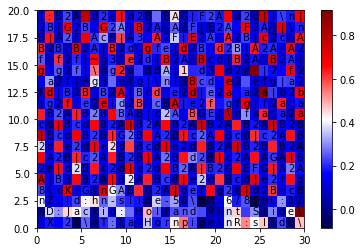

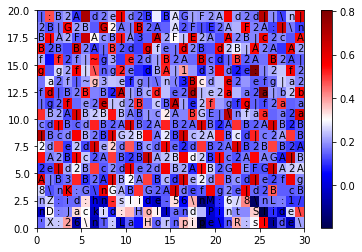

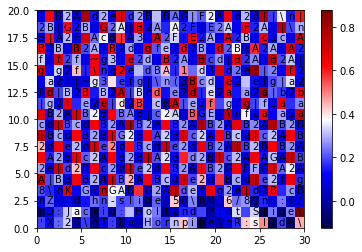

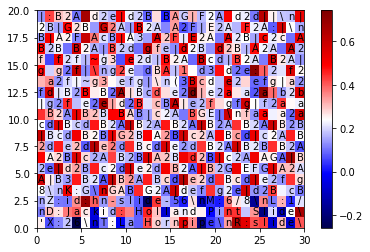

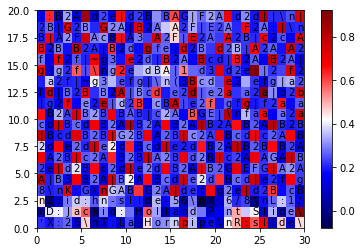

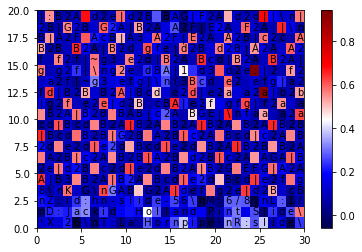

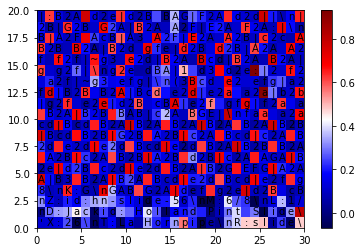

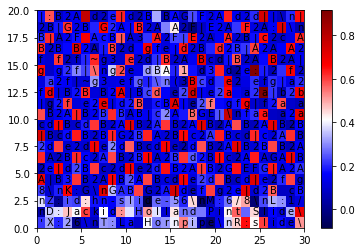

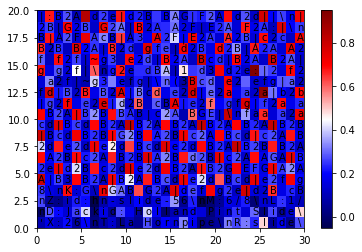

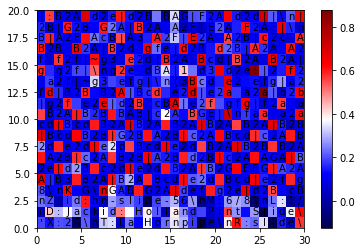

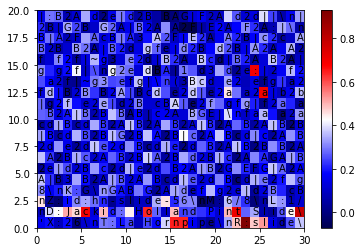

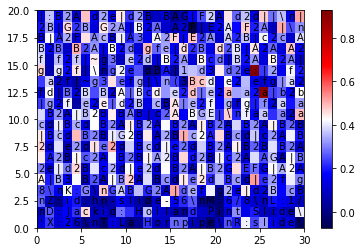

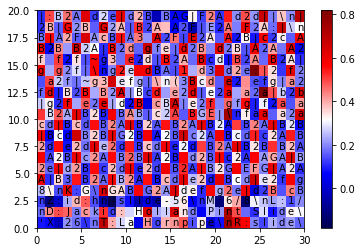

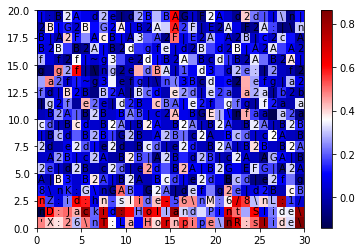

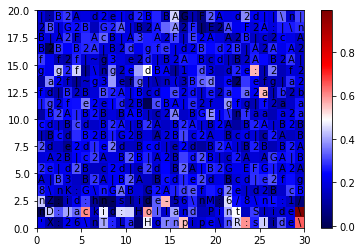

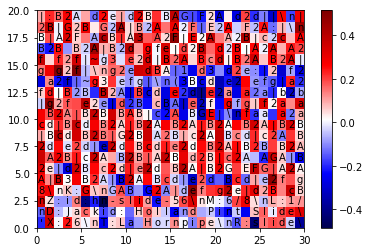

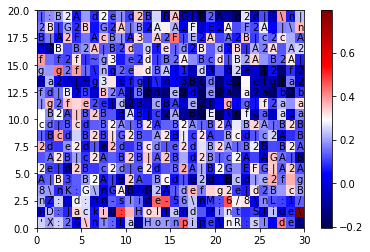

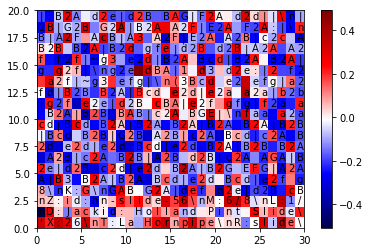

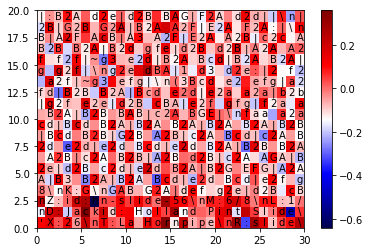

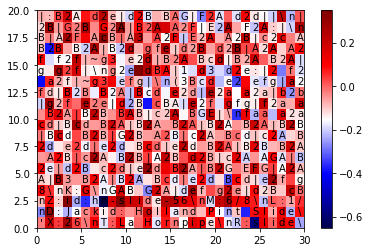

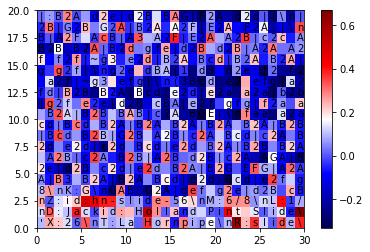

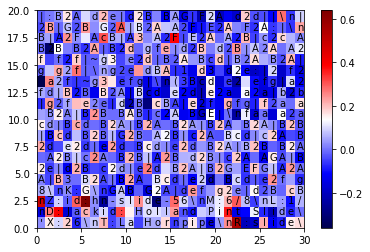

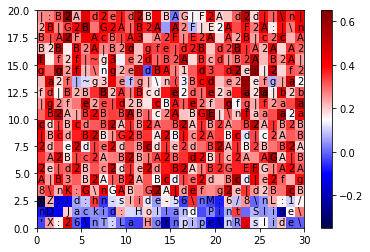

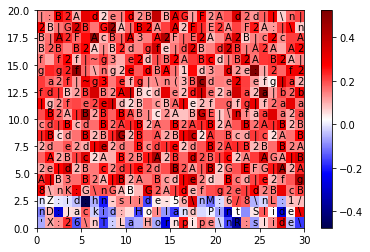

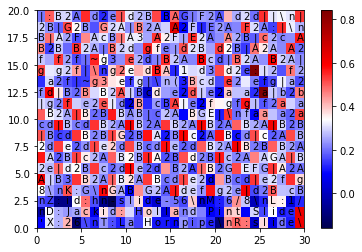

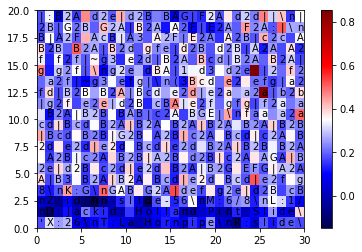

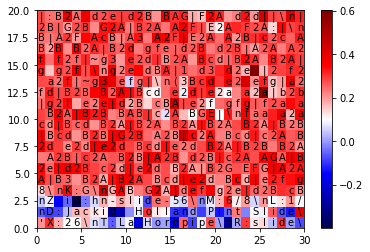

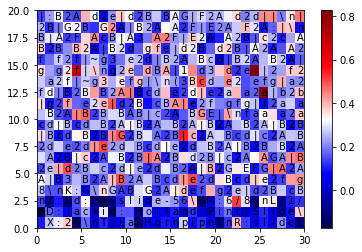

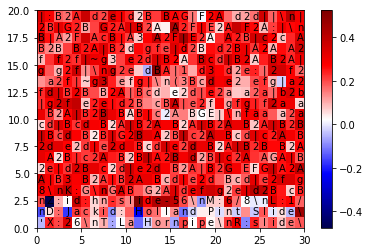

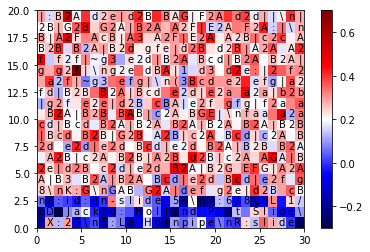

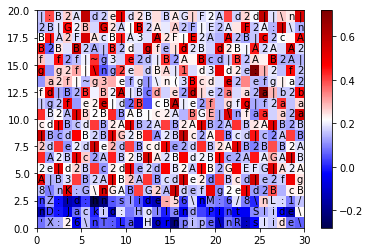

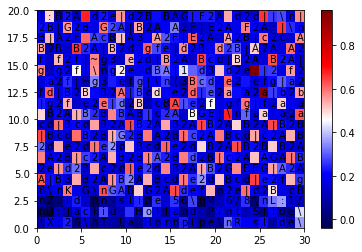

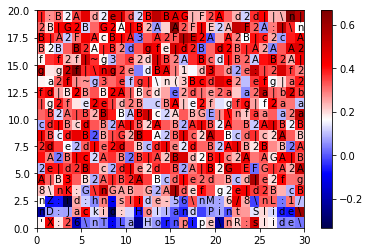

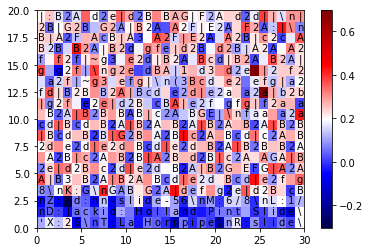

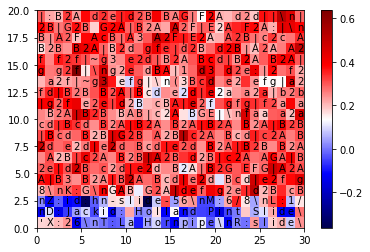

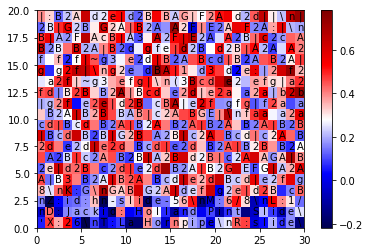

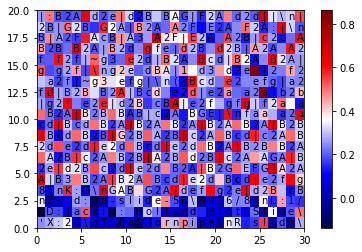

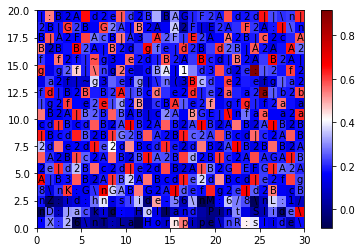

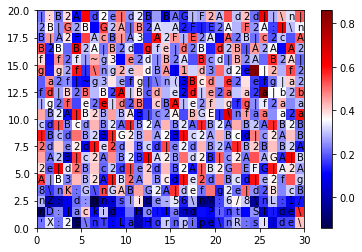

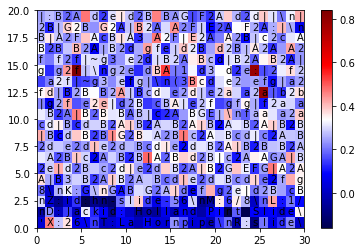

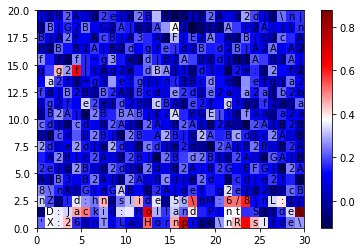

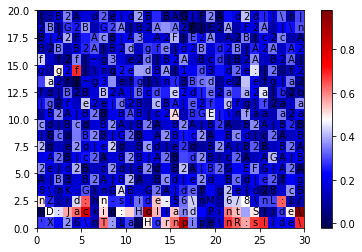

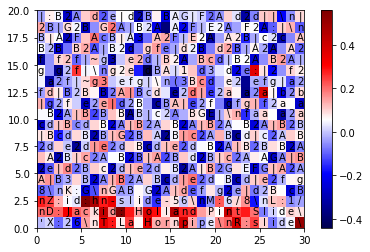

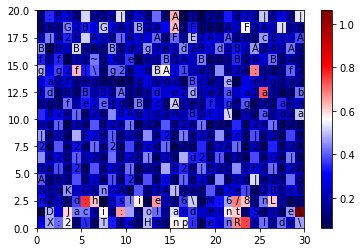

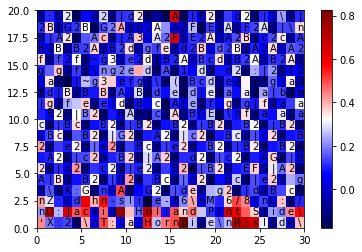

In [10]:
# for i in range(len(activation_container)):
# 
n_number = 93
activation_matrix = np.zeros((len(activation_container), n_number))
for i in range(len(activation_container)):
#     activation_container[i].cpu().data.numpy().reshape(1,100)
    activation_matrix[i,:] = activation_container[i].cpu().data.numpy().reshape(1,n_number)

    
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
# from matplotlib.mlab import bivariate_normal
# plt.pcolor
st_m = "%r"%st
counter = 0
for i in range(n_number):
    neuron_activation = activation_matrix[:,i]
# plt.bar(np.arange(len(nuron_activation)), neuron_activation)
    m = -neuron_activation.reshape(20,30)
    m = m / (np.max(m) - np.min(m))
    
    ax =plt.pcolor(m,cmap='seismic')
    plt.colorbar()
#     plt.clim(-0.01,0.001)
    for x in range(20):
        for y in range(30):
            plt.text(y+0.5,x+0.5, '%s' % st_m[counter],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
            counter += 1
    counter = 0
    plt.show()
#     plt.savefig(ax,"./"str(i)+".jpg")